# Analyses post scrapping

Objectifs :
- on veut surveiller le nombre de concurrents
- ceux qui arrivent à vendre
- ceux qui changent de stratégie

In [90]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import datetime

In [159]:
villes = ['Arcueil', 'Bourg-la-Reine', 'Cachan']
df = pickle.load(open('tous_les_logements.p', 'rb')).drop('texte', axis=1)
df = df[df.ville.isin(villes)].copy()

# Cet exemple montre qu'on a des doublons parfaits :
df[(df.description == 'Summer 2023 Cheerful 3-bedroom family home')]
clé = ['type', 'ville', 'description']
# Validation de la clé :
df = df.drop_duplicates(['date_enregistrement'] + clé)

# À une date d'enregistrement donné, ce qui fait l'unicité d'un logement est la combinaison
# de variables suivantes :
test = df.groupby(['date_enregistrement'] + clé).prix.nunique()
assert test[test != 1].size == 0

print(df.shape)
df.tail(2)

(443, 11)


,date_enregistrement,type,ville,description,prix,note,nb_avis,nb_lits,nb_chambres,est_professionnel,est_nouveau
989,2024-02-18,Appartement,Arcueil,GuestReady - Appartement Lumineux à Arcueil,490,NaN,NaN,NaN,NaN,True,False
995,2024-02-18,Appartement,Arcueil,Duplex élégance,982,4.35,23.0,4.0,3.0,True,False


In [160]:
# Nombre de concurrents
df.groupby(['date_enregistrement', 'ville']).date_enregistrement.count().to_frame().unstack().T

date_enregistrement                 2023-12-20  2023-12-25  2024-01-06  \
                    ville                                                
date_enregistrement Arcueil                  6          15          17   
                    Bourg-la-Reine           8          10           7   
                    Cachan                  34          32          34   

date_enregistrement                 2024-01-13  2024-01-25  2024-01-31  \
                    ville                                                
date_enregistrement Arcueil                  6          15          16   
                    Bourg-la-Reine           5           6           7   
                    Cachan                  40          34          39   

date_enregistrement                 2024-02-10  2024-02-18  
                    ville                                   
date_enregistrement Arcueil                 20           9  
                    Bourg-la-Reine           6           1  
                    Cachan                  38          38

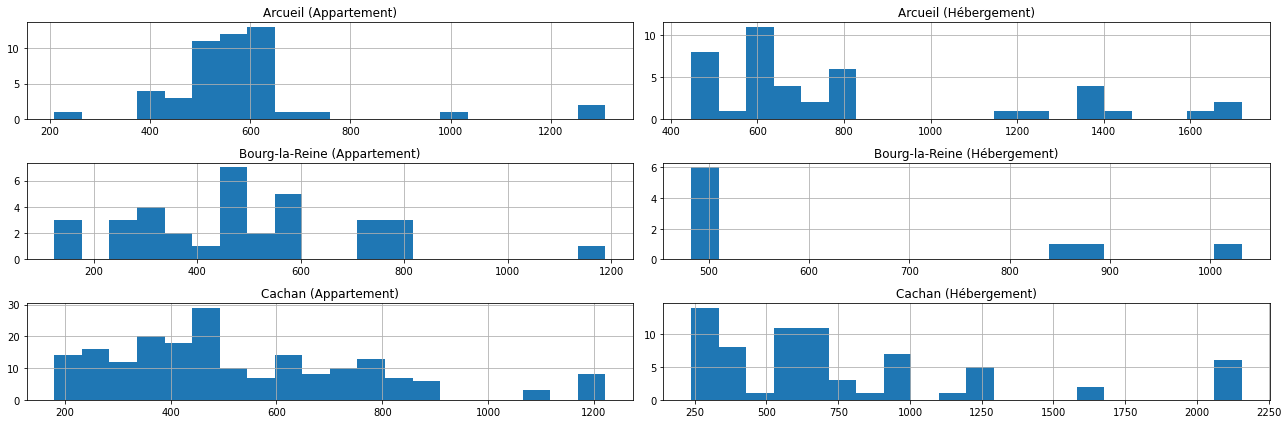

In [161]:
fig = plt.figure(figsize=(18, 6))
num_plot = 1
for ville in villes:
    vue = df[df.ville == ville]
    for type_ in ('Appartement', 'Hébergement'):
        fig.add_subplot(len(villes), 2, num_plot)
        plt.title(f'{ville} ({type_})')
        vue[vue.type == type_].prix.hist(bins=20)
        num_plot += 1
plt.tight_layout()

In [162]:
# Être nouveau augmente les prix
df.groupby('est_nouveau').prix.mean()

est_nouveau
False    601.821530
True     667.922222
Name: prix, dtype: float64

In [163]:
# Être professionnel aussi
df.groupby('est_professionnel').prix.mean()

est_professionnel
False    606.57
True     696.00
Name: prix, dtype: float64

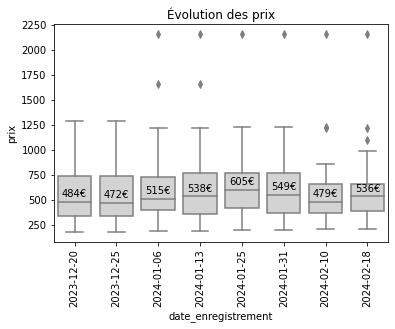

In [164]:
# Comment évoluent les prix ?
import seaborn as sns
vue = df[df.ville == 'Cachan']


sns.boxplot(x=vue.date_enregistrement, y=vue.prix, color='lightgray')
médianes = vue.groupby('date_enregistrement').prix.median()
for i, médiane in enumerate(médianes):
    plt.text(i, médiane + 50, f'{médiane:.0f}€', ha='center')
plt.xticks(rotation=90)
plt.title('Évolution des prix');

## Suivi des logements dans le temps

In [165]:
df.sample(3)

,date_enregistrement,type,ville,description,prix,note,nb_avis,nb_lits,nb_chambres,est_professionnel,est_nouveau
320,2024-01-13,Appartement,Arcueil,Le bonheur d'être chez soi à Paris,611,4.93,73.0,2.0,1.0,True,False
837,2024-02-10,Appartement,Arcueil,Appartement 2 pièces.,400,NaN,NaN,NaN,NaN,False,True
473,2024-01-25,Appartement,Arcueil,L'Essentiel : Appartement lumineux proche de tout,581,4.86,7.0,NaN,NaN,True,False


In [166]:
pivot = df.pivot(columns=['date_enregistrement'], values='prix', index=clé)
pivot.head()

date_enregistrement                                                     2023-12-20  \
type        ville   description                                                      
Appartement Arcueil 49euros/nuit,T2 mn àpiedMaisonExamen10mnPARIS              NaN   
                    Appartement 2 pièces.                                      NaN   
                    Appartement Cocon avec parking privé près de Paris         NaN   
                    Appartement cosy                                           NaN   
                    Appartement duplex - Arcueil                             565.0   

date_enregistrement                                                     2023-12-25  \
type        ville   description                                                      
Appartement Arcueil 49euros/nuit,T2 mn àpiedMaisonExamen10mnPARIS              NaN   
                    Appartement 2 pièces.                                      NaN   
                    Appartement Cocon avec parking privé près de Paris       690.0   
                    Appartement cosy                                           NaN   
                    Appartement duplex - Arcueil                             565.0   

date_enregistrement                                                     2024-01-06  \
type        ville   description                                                      
Appartement Arcueil 49euros/nuit,T2 mn àpiedMaisonExamen10mnPARIS              NaN   
                    Appartement 2 pièces.                                      NaN   
                    Appartement Cocon avec parking privé près de Paris       558.0   
                    Appartement cosy                                           NaN   
                    Appartement duplex - Arcueil                             597.0   

date_enregistrement                                                     2024-01-13  \
type        ville   description                                                      
Appartement Arcueil 49euros/nuit,T2 mn àpiedMaisonExamen10mnPARIS              NaN   
                    Appartement 2 pièces.                                      NaN   
                    Appartement Cocon avec parking privé près de Paris         NaN   
                    Appartement cosy                                           NaN   
                    Appartement duplex - Arcueil                               NaN   

date_enregistrement                                                     2024-01-25  \
type        ville   description                                                      
Appartement Arcueil 49euros/nuit,T2 mn àpiedMaisonExamen10mnPARIS              NaN   
                    Appartement 2 pièces.                                    400.0   
                    Appartement Cocon avec parking privé près de Paris       533.0   
                    Appartement cosy                                           NaN   
                    Appartement duplex - Arcueil                             597.0   

date_enregistrement                                                     2024-01-31  \
type        ville   description                                                      
Appartement Arcueil 49euros/nuit,T2 mn àpiedMaisonExamen10mnPARIS              NaN   
                    Appartement 2 pièces.                                    400.0   
                    Appartement Cocon avec parking privé près de Paris       533.0   
                    Appartement cosy                                           NaN   
                    Appartement duplex - Arcueil                             597.0   

date_enregistrement                                                     2024-02-10  \
type        ville   description                                                      
Appartement Arcueil 49euros/nuit,T2 mn àpiedMaisonExamen10mnPARIS            209.0   
                    Appartement 2 pièces.                                    400.0   
                    Appartement Cocon 

In [168]:
# Ceux qui ont l'air d'avoir loué
# (ils n'apparaissent plus depuis au moins deux scrapings)
nb = 2
last_cols = pivot.columns[-nb:].tolist()
cond = pivot[last_cols].isnull().sum(axis=1) == nb
loués = pivot[cond].reset_index()
pd.merge(
    loués[loués.ville == 'Cachan'],
    df[clé + ['nb_chambres']],
    on=clé, how='inner'
)

,type,ville,description,2023-12-20,2023-12-25,2024-01-06,2024-01-13,2024-01-25,2024-01-31,2024-02-10,2024-02-18,nb_chambres
0,Appartement,Cachan,"54euros/nuit ,petit T2 face bus12mn PARIS",NaN,NaN,NaN,NaN,NaN,223.0,NaN,NaN,NaN
1,Appartement,Cachan,Appartement 6 invités à 25 min du centre de Paris,473.0,473.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Appartement,Cachan,Appartement 6 invités à 25 min du centre de Paris,473.0,473.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Appartement,Cachan,"Appartement 86m2, 6p, 3km Paris",494.0,494.0,526.0,526.0,526.0,NaN,NaN,NaN,NaN
4,Appartement,Cachan,"Appartement 86m2, 6p, 3km Paris",494.0,494.0,526.0,526.0,526.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
70,Villa,Cachan,Jardin fleuri tout près de Paris,916.0,916.0,831.0,831.0,831.0,NaN,NaN,NaN,3.0
71,Villa,Cachan,Jardin fleuri tout près de Paris,916.0,916.0,831.0,831.0,831.0,NaN,NaN,NaN,NaN
72,Villa,Cachan,Maison et jardin boisé A 10 minutes de Paris !,805.0,NaN,NaN,NaN,NaN,837.0,NaN,NaN,NaN
73,Villa,Cachan,Maison et jardin boisé A 10 minutes de Paris !,805.0,NaN,NaN,NaN,NaN,837.0,NaN,NaN,NaN


In [169]:
# Parmi ceux qui ont loué, combien avaient concédé à une baisse de prix ?
(loués.filter(regex='20').nunique(axis=1) > 1).sum() / len(loués)

0.288135593220339

In [171]:
# Ceux qui changent de stratégie :
changeurs = pivot[pivot.nunique(axis=1) > 1].reset_index()
changeurs[changeurs.ville == 'Cachan']

date_enregistrement,type,ville,description,2023-12-20,2023-12-25,2024-01-06,2024-01-13,2024-01-25,2024-01-31,2024-02-10,2024-02-18
9,Appartement,Cachan,2P a 10 min à pied du RER B,389.0,380.0,395.0,385.0,246.0,246.0,246.0,227.0
10,Appartement,Cachan,Appartement - 2 pièces + Salon,1190.0,1190.0,1222.0,1222.0,1222.0,1222.0,1222.0,1222.0
11,Appartement,Cachan,"Appartement 86m2, 6p, 3km Paris",494.0,494.0,526.0,526.0,526.0,NaN,NaN,NaN
12,Appartement,Cachan,Appartement Cachan,NaN,NaN,NaN,NaN,824.0,824.0,424.0,687.0
13,Appartement,Cachan,Appartement Entier Lumineux Cachan 54m2,269.0,269.0,269.0,269.0,269.0,269.0,249.0,261.0
14,Appartement,Cachan,Appartement La Maison Blanche,185.0,185.0,NaN,200.0,NaN,200.0,NaN,NaN
15,Appartement,Cachan,Appartement Loft atypique avec terrasse,670.0,670.0,702.0,702.0,702.0,702.0,NaN,NaN
16,Appartement,Cachan,Appartement entier calme pour JO 2024,NaN,472.0,504.0,474.0,474.0,474.0,474.0,474.0
17,Appartement,Cachan,Appartement lumineux,NaN,750.0,NaN,782.0,782.0,782.0,477.0,477.0
18,Appartement,Cachan,Appartement lumineux à 5 min à pied du RER B,389.0,389.0,420.0,420.0,420.0,420.0,420.0,420.0


In [19]:
cols = gb.columns
for i in range(0, len(cols) - 1):
    diff = gb[cols[i + 1]] - gb[cols[i]]
    print(cols[i], ':', round(diff.mean()))

2023-12-20 : -1
2023-12-25 : -3
2024-01-06 : -13
2024-01-13 : -3
2024-01-25 : -3
2024-01-31 : -14


## Annexes

In [122]:
# Recherche d'une clé primaire : 
variables_dynamiques = ['date_enregistrement', 'est_nouveau', 'note', 'nb_avis']
vue = df.drop(variables_dynamiques, axis=1).drop_duplicates()
vue[vue[clé].duplicated(keep=False)]

# --> les logements qui apparaissent sont ceux qui ont changé de stratégie de prix !
# --> la clé ['ville', 'type', 'description'] identifie donc un logement de façon unique

,type,ville,description,prix,nb_lits,nb_chambres,est_professionnel
41,Hébergement,Arcueil,La Maison Ensoleillée - 2 Chambres - RER B & M7,1425,NaN,NaN,False
57,Appartement,Cachan,2P a 10 min à pied du RER B,389,NaN,NaN,False
197,Appartement,Cachan,2P a 10 min à pied du RER B,380,NaN,NaN,False
239,Hébergement,Arcueil,La Maison Ensoleillée - 2 Chambres - RER B & M7,1355,NaN,NaN,False
